In [8]:
import matplotlib.pyplot as plt
from tabulate import tabulate
import matplotlib as mat
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [9]:
pwd

'C:\\Users\\Manish'

In [10]:
df=pd.read_csv('C:\\Users\\Manish\\data.csv')
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,816,28,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,15476,117,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,8764,69,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,10291,60,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,8395,62,0.000


### 7. Card category wise analysis of customers who are high school pass outs and churned out

In [11]:
data = df[(df.Education_Level == "High School") & (df.Attrition_Flag == "Attrited Customer")]
data = df["Card_Category"].value_counts()
print(data/sum(data))


Blue        0.931966
Silver      0.054427
Gold        0.011606
Platinum    0.002001
Name: Card_Category, dtype: float64


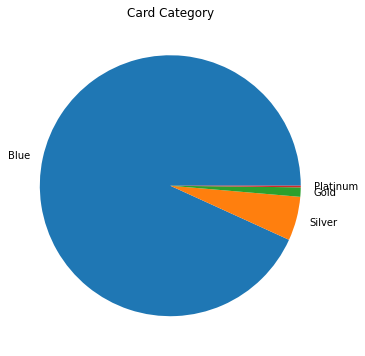

In [13]:
pie, ax = plt.subplots(figsize = [10,6])  
labels = data.keys()
ax.pie(x = data, labels = labels)
plt.title("Card Category")
plt.show()                                          

Interpretation: Blue card category has higher (0.931966) number of customers who are high school pass outs and churned out.

### 8. Income category wise breakdown of customers who are high school passouts and still with the bank.

In [14]:
data = df[(df.Education_Level == "High School") & (df.Attrition_Flag =="Existing Customer")]
data = data["Income_Category"].value_counts()
print(data/sum(data))


Less than $40K    0.333919
$40K - $60K       0.178090
$80K - $120K      0.156415
$60K - $80K       0.155243
Unknown           0.106620
$120K +           0.069713
Name: Income_Category, dtype: float64


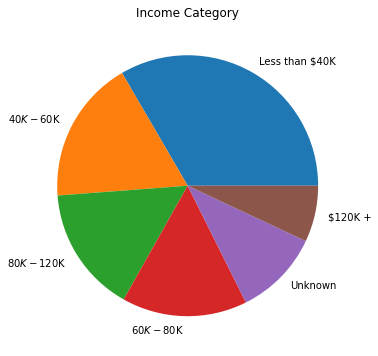

In [15]:
pie, ax = plt.subplots(figsize = [10,6])
labels = data.keys()
ax.pie(x = data, labels = labels)
plt.title("Income Category")
plt.show()

Interpretation:The highest number of customers who are high school passouts and still with the bank, having income less than 40k.

### 9. Present the details of Total Transaction Amount of existing customers who are high school pass outs. 

In [12]:
data = df[(df.Education_Level == "High School") & (df.Attrition_Flag == "Existing Customer")]
data["Total_Trans_Amt"]

0         1144
3         1171
7         1538
18        1336
22         931
         ...  
10091    16344
10093    15349
10097    17744
10109    17093
10120    15577
Name: Total_Trans_Amt, Length: 1707, dtype: int64

In [16]:
data = df[(df.Education_Level == "High School") & (df.Attrition_Flag == "Existing Customer")]
data["Total_Trans_Amt"].sum()

7921729

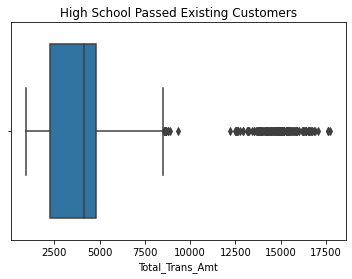

In [13]:
sns.boxplot(x = data["Total_Trans_Amt"])
plt.title("High School Passed Existing Customers")      
plt.show()       


Interpretation: The sum of total transaction amount of existing customers who are high school pass outs : 7921729

### 10. Analysis of the education level of the customers who are with the bank and those who left

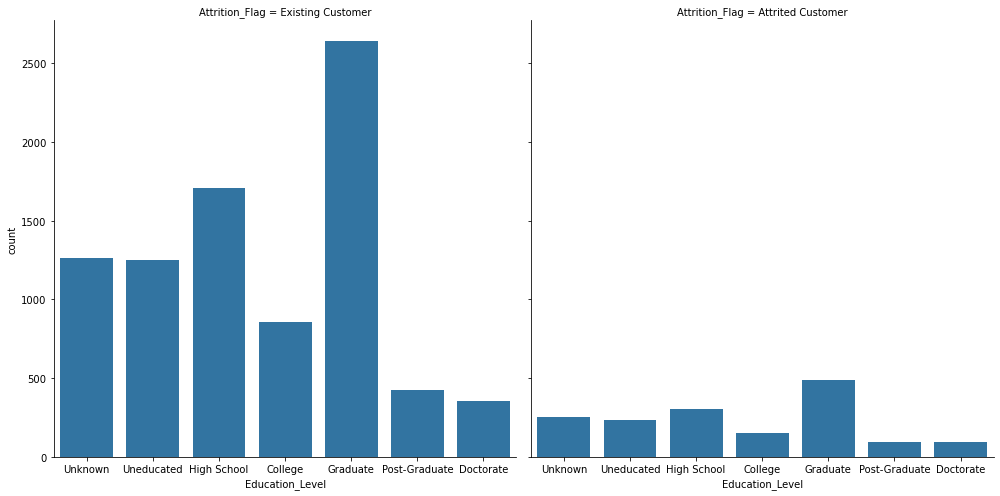

In [27]:
g = sns.FacetGrid(df, col = "Attrition_Flag", height = 7)
g.map(sns.countplot, "Education_Level", order = ["Unknown", "Uneducated","High School", "College","Graduate", "Post-Graduate", "Doctorate"])
plt.show()


Interpretation: In existing customer, gradutes customers are more than others and customers who has left was graduate and highschool(in comparison to others). 

### 11. Analysis of Transaction Amount (mean, median, and mode) made by the existing customers and comparing it with those who are not existing

In [24]:
exis = df[df.Attrition_Flag == "Existing Customer"]
att = df[df.Attrition_Flag == "Attrited Customer"]
print("Existing customers:\n",exis["Total_Trans_Amt"].describe())
print("Not existing customers:\n",att["Total_Trans_Amt"].describe())


Existing customers:
 count     8500.000000
mean      4654.655882
std       3512.772635
min        816.000000
25%       2384.750000
50%       4100.000000
75%       4781.250000
max      18484.000000
Name: Total_Trans_Amt, dtype: float64
Not existing customers:
 count     1627.000000
mean      3095.025814
std       2308.227629
min        510.000000
25%       1903.500000
50%       2329.000000
75%       2772.000000
max      10583.000000
Name: Total_Trans_Amt, dtype: float64


Interpretation: The mean, median mode of existing customers are 4654.66, 3512.77, 8500.00 and for Non-existing are 3095.03,2308.23,1627.00.

### 12. What is the average utilization ratio of the existing customers?

Average utilization ratio of existing customers :  0.3027891036906852


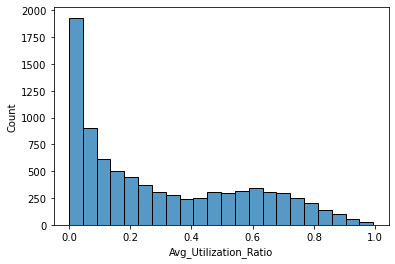

In [16]:
print("Average utilization ratio of existing customers : ",data["Avg_Utilization_Ratio"].mean())
data = df[df.Attrition_Flag == "Existing Customer"]
sns.histplot(x = data["Avg_Utilization_Ratio"])
plt.show()


Interpretation: The average utilization ratio of existing customers is 0.30 .

### 13. Analysis of the churned out customers who hold the blue card with respect to their income categories

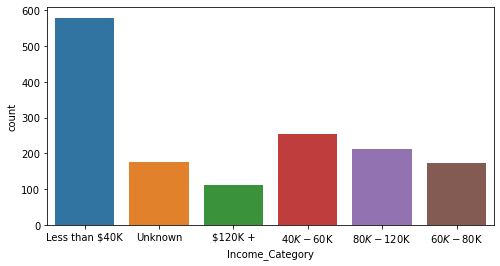

In [17]:
data = df[(df.Attrition_Flag == "Attrited Customer") & (df.Card_Category == "Blue")]
fig, ax = plt.subplots(figsize = (8, 4))
sns.countplot(x = data["Income_Category"])
plt.show()


Interpretation: The highest number of blue card holders are Customers with income less than 40K.

### 14. Analysis of transaction amount (mean, median, mode) for blue card customers who are no longer with the bank and comparing it with the existing customers.

In [18]:
exi = df[(df.Attrition_Flag == "Existing Customer") & (df.Card_Category == "Blue")]["Total_Trans_Amt"]
attr = df[(df.Attrition_Flag == "Attrited Customer") & (df.Card_Category == "Blue")]["Total_Trans_Amt"]
print("Existing customers:\n",exi.describe())
print("Customers who are no longer with the bank:\n",attr.describe())


Existing customers:
 count     7814.000000
mean      4473.625160
std       3302.296779
min        816.000000
25%       2315.000000
50%       4087.000000
75%       4738.750000
max      18484.000000
Name: Total_Trans_Amt, dtype: float64
Customers who are no longer with the bank:
 count     1501.000000
mean      2942.893404
std       2167.401917
min        510.000000
25%       1893.000000
50%       2314.000000
75%       2705.000000
max      10583.000000
Name: Total_Trans_Amt, dtype: float64


Interpretation: With blue card category Existing customers has more number of transactions in comparison to customers who has left.

### 15. How is the credit limit of the blue card customers affecting the churn?

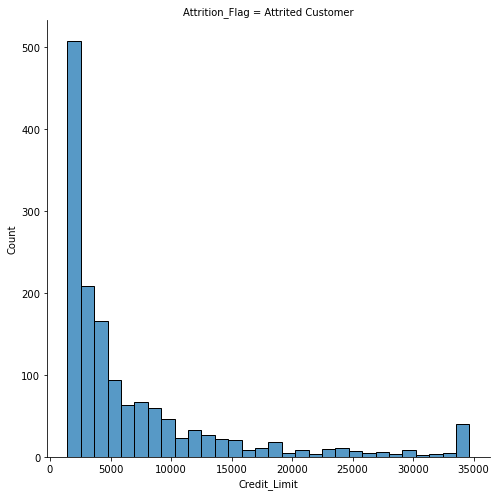

In [19]:
ata = df[df.Card_Category == "Blue"]
g = sns.FacetGrid(data, col = "Attrition_Flag", height = 7)
g.map(sns.histplot, "Credit_Limit")
plt.show()


Interpretation: Customers with higher credit limits has less churn rate.

### 16. Analysis of the dependent count with respect to the customers who have churned out and the customers who are still using the services

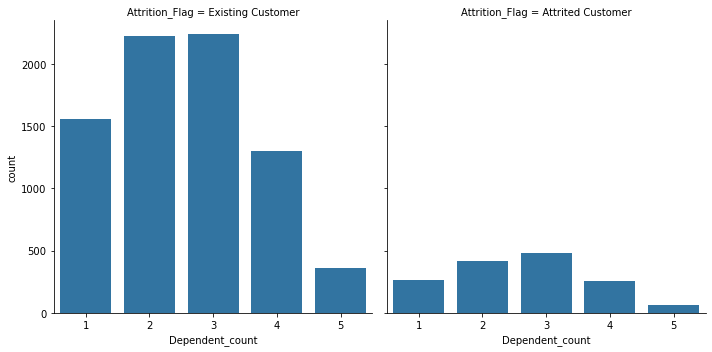

In [20]:
g = sns.FacetGrid(df, col = "Attrition_Flag", height = 5)
g.map(sns.countplot, "Dependent_count", order = [1,2,3,4,5])
plt.show()


Interpretation: Existing customers has more number of dependants count than who have churned out and no longer with the bank.

### 17. Is there a relation between the credit limit and the attrition of the customers?

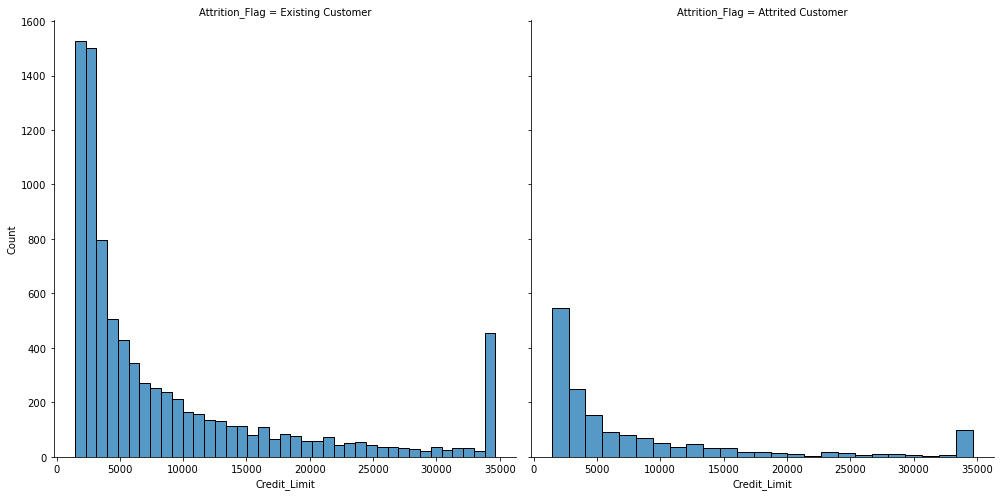

In [21]:
g = sns.FacetGrid(df, col = "Attrition_Flag", height = 7)
g.map(sns.histplot, "Credit_Limit")
plt.show()

Interpretation: Less credit limit has high attrition rate.

### 18. What is the average utilization ratio of the credit card for each age sub-group between 40 and 50? (We need to group the customers into 4 buckets between 40 and 50.)

In [22]:
data = df[(df.Customer_Age >= 40) & (df.Customer_Age <= 50)]
data["Avg_Utilization_Ratio"].mean()

0.2571893954609358

Interpretation: The average utilization ratio of the credit card for each age sub group between 40 to 50 is 0.26

### 19. How are the education level and income category affecting the customer churn?

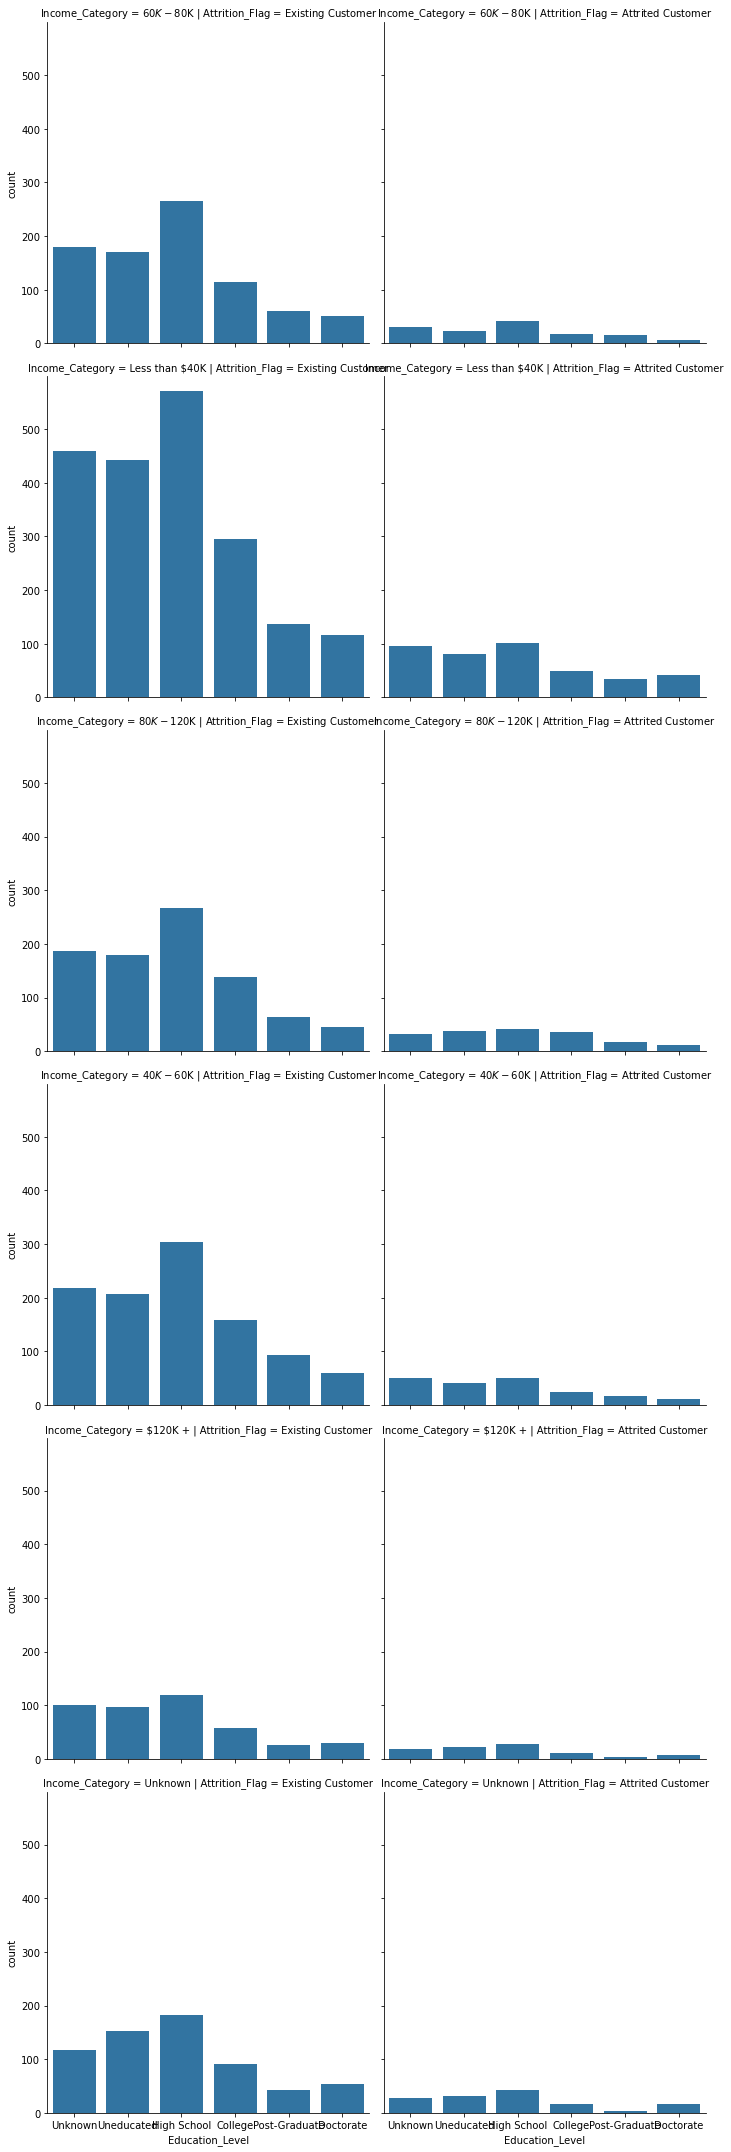

In [23]:
g = sns.FacetGrid(df, col = "Attrition_Flag", row = "Income_Category", height= 5)
g.map(sns.countplot, "Education_Level", order = ["Unknown", "Uneducated","High School", "College", "Post-Graduate", "Doctorate"])
plt.show()

Interpretation: Customers with income less than 40k in all education category has higher attrition rate.

### 20. Identify the churned out customers with high income category, high education level, and high credit limit.

In [30]:
df.Income_Category.unique()
df.Education_Level.unique()
data = df[(df.Education_Level == "Doctorate") & (df.Income_Category =="$120K +") & (df.Credit_Limit > 23000)& (df.Attrition_Flag=="Attrited Customer")]
data.describe()





,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
count,2.000000e+00,2.000000,2.000000,2.0,2.000000,2.0,2.0,2.0,2.00000,2.00000,2.000000,2.000000,2.000000
mean,7.837503e+08,51.000000,2.500000,45.0,3.500000,3.0,3.0,34516.0,275.00000,34241.00000,4957.000000,63.000000,0.008000
std,3.535106e+07,1.414214,0.707107,0.0,3.535534,0.0,0.0,0.0,388.90873,388.90873,3371.485133,11.313708,0.011314
min,7.587533e+08,50.000000,2.000000,45.0,1.000000,3.0,3.0,34516.0,0.00000,33966.00000,2573.000000,55.000000,0.000000
25%,7.712518e+08,50.500000,2.250000,45.0,2.250000,3.0,3.0,34516.0,137.50000,34103.50000,3765.000000,59.000000,0.004000
50%,7.837503e+08,51.000000,2.500000,45.0,3.500000,3.0,3.0,34516.0,275.00000,34241.00000,4957.000000,63.000000,0.008000
75%,7.962487e+08,51.500000,2.750000,45.0,4.750000,3.0,3.0,34516.0,412.50000,34378.50000,6149.000000,67.000000,0.012000
max,8.087472e+08,52.000000,3.000000,45.0,6.000000,3.0,3.0,34516.0,550.00000,34516.00000,7341.000000,71.000000,0.016000


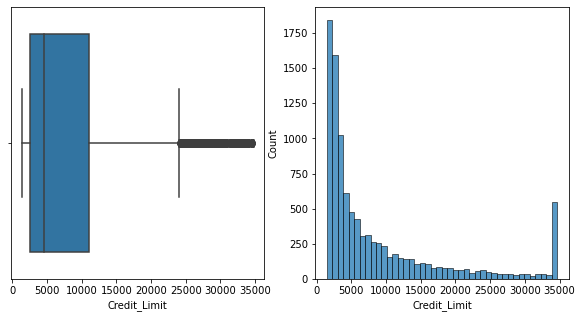

In [31]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.boxplot(x = df["Credit_Limit"], ax = ax[0])
sns.histplot(x = df["Credit_Limit"], ax = ax[1])
plt.show()


### 21. Is there is a relation between the attrition and the age of customers who have a lower utilization ratio?

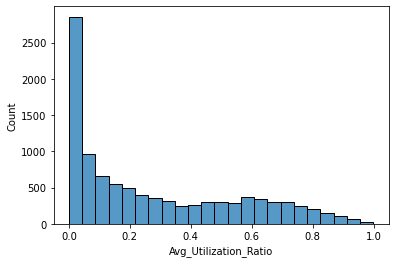

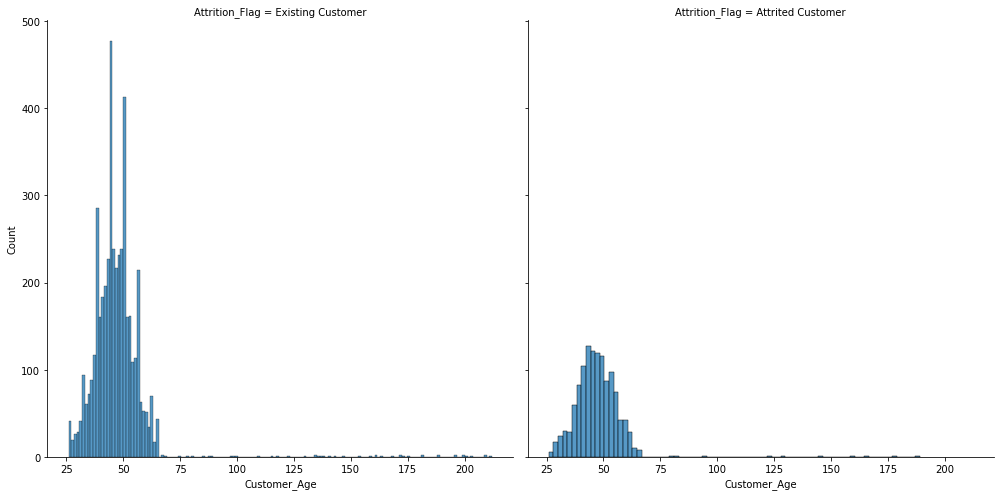

In [26]:
sns.histplot(df["Avg_Utilization_Ratio"])
plt.show()
data = df[df["Avg_Utilization_Ratio"] <= 0.25]
g = sns.FacetGrid(data, col = "Attrition_Flag", height = 7)
g.map(sns.histplot, "Customer_Age")
plt.show()

Interpretation:  Average age is between 25-70 With low utilization ratio(less than<0.25)

### 22. Analysis of marital status and utilization ratio of the customers who are leaving out the bank versus those who are still with the bank

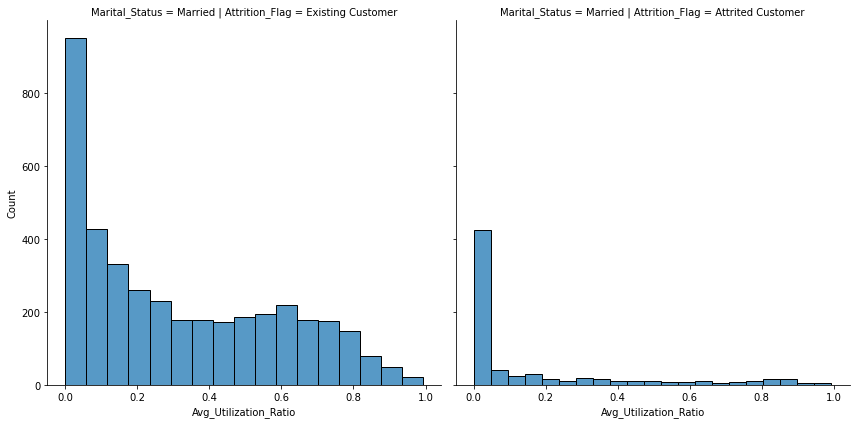

In [27]:
new_df=df[(df.Marital_Status =='Married')]
g = sns.FacetGrid(new_df, col = "Attrition_Flag", row = "Marital_Status", height= 6)
g.map(sns.histplot, "Avg_Utilization_Ratio")
plt.show()

Interpretation: Higher number of married customers are who has utilization ratio less than 0.2.

### 23. Is there a relation between the credit limit offered to the customers (having a lower utilization ratio) compared to those who are having a higher utilization ratio?

In [28]:
df["Avg_Utilization_Ratio"].describe()


count    10127.000000
mean         0.274894
std          0.275691
min          0.000000
25%          0.023000
50%          0.176000
75%          0.503000
max          0.999000
Name: Avg_Utilization_Ratio, dtype: float64

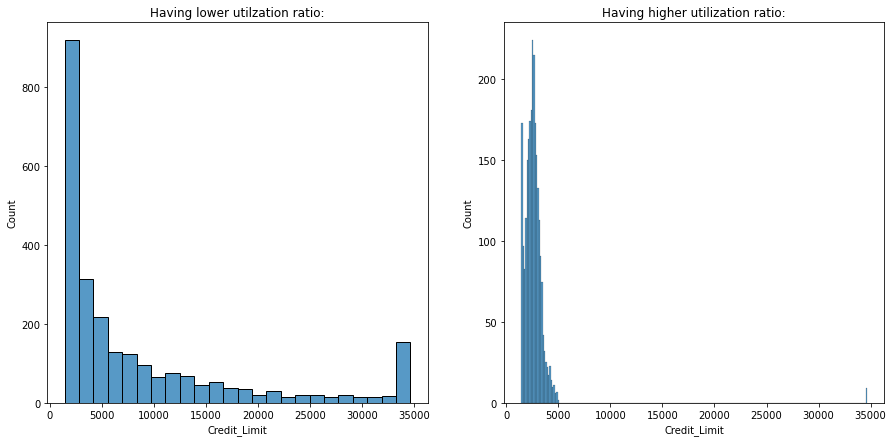

In [30]:
bel = df[df.Avg_Utilization_Ratio < 0.023]
abov = df[df.Avg_Utilization_Ratio > 0.50]
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(bel["Credit_Limit"], ax = ax[0])
sns.histplot(abov["Credit_Limit"], ax = ax[1])
ax[0].set_title("Having lower utilzation ratio:")
ax[1].set_title("Having higher utilization ratio:")
plt.show()

Interpretation: Customers with higher utilization ratio has higher credit limit.